In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('xtick', labelsize=13) 

In [2]:
# real_data_xp_low_m, real_data_xp
data = pd.read_csv('precompute_results/real_data_xp_low_m.csv')
data_filt = data.query('dataset=="bio"')
name_dataset = 'bio'

In [3]:
data.head()

,dataset,method,num_xp,CQR_FL_coverage,CQR_coverage,CQR_M_coverage,CQR_FL_length,CQR_length,CQR_M_length
0,bike,RidgeCV,0,86.893204,86.893204,94.174757,2.381859,2.346079,2.952687
1,bike,RidgeCV,1,91.262136,91.262136,93.203883,2.193417,2.214231,2.601651
2,bike,RidgeCV,2,88.349515,88.349515,94.174757,2.276193,2.316818,3.112416
3,bike,RidgeCV,3,90.776699,91.747573,93.689320,2.225311,2.270488,2.702658
4,bike,RidgeCV,4,93.203883,93.203883,96.116505,2.725027,2.725027,3.470689


In [4]:
B = 20

X_RCV_FL = np.vstack((np.repeat('Ridge CP-QQ', B), data_filt.query('method=="RidgeCV"')['CQR_FL_coverage'])).T
X_RCV = np.vstack((np.repeat('Ridge Central', B), data_filt.query('method=="RidgeCV"')['CQR_coverage'])).T
X_RCV_m = np.vstack((np.repeat('Ridge CP-avg', B), data_filt.query('method=="RidgeCV"')['CQR_M_coverage'])).T

X_RF_FL = np.vstack((np.repeat('RF CP-QQ', B), data_filt.query('method=="Random_Forest"')['CQR_FL_coverage'])).T
X_RF = np.vstack((np.repeat('RF Central', B), data_filt.query('method=="Random_Forest"')['CQR_coverage'])).T
X_RF_m = np.vstack((np.repeat('RF CP-avg', B), data_filt.query('method=="Random_Forest"')['CQR_M_coverage'])).T

X_NN_FL = np.vstack((np.repeat('NN CP-QQ', B), data_filt.query('method=="NeuralNet"')['CQR_FL_coverage'])).T
X_NN = np.vstack((np.repeat('NN Central', B), data_filt.query('method=="NeuralNet"')['CQR_coverage'])).T
X_NN_m = np.vstack((np.repeat('NN CP-avg', B), data_filt.query('method=="NeuralNet"')['CQR_M_coverage'])).T

In [5]:
Y = np.vstack((X_RCV_FL, X_RCV, X_RCV_m, 
               X_RF_FL, X_RF, X_RF_m, 
               X_NN_FL, X_NN, X_NN_m))
df = pd.DataFrame(Y, columns=('method', 'coverage'))
df['coverage'] = df['coverage'].astype('float64')/100.

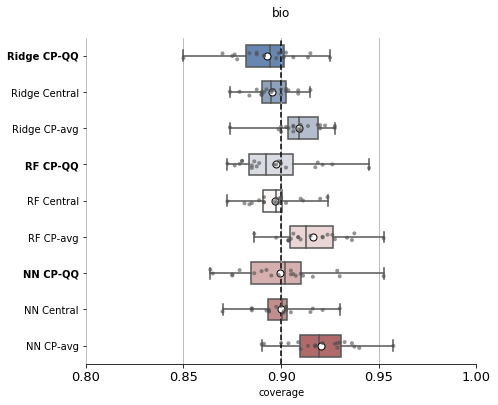

In [6]:
f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="coverage", y="method", data=df, whis=[0, 100], width=.6, palette="vlag", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

sns.stripplot(x="coverage", y="method", data=df, size=4, color=".3", linewidth=0, alpha=.6)

plt.title(name_dataset + '\n')
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_xlim(.8, 1.)
sns.despine(trim=True, left=True)
plt.axvline(.9, color='k', ls='--')
ax.get_yticklabels()[0].set_fontweight("bold")
ax.get_yticklabels()[3].set_fontweight("bold")
ax.get_yticklabels()[6].set_fontweight("bold")
plt.xticks((.8, .85, .9, .95, 1.));

In [7]:
X_RCV_FL = np.vstack((np.repeat('Ridge CP-QQ', B), data_filt.query('method=="RidgeCV"')['CQR_FL_length'])).T
X_RCV = np.vstack((np.repeat('Ridge Central', B), data_filt.query('method=="RidgeCV"')['CQR_length'])).T
X_RCV_m = np.vstack((np.repeat('Ridge CP-avg', B), data_filt.query('method=="RidgeCV"')['CQR_M_length'])).T

X_RF_FL = np.vstack((np.repeat('RF CP-QQ', B), data_filt.query('method=="Random_Forest"')['CQR_FL_length'])).T
X_RF = np.vstack((np.repeat('RF Central', B), data_filt.query('method=="Random_Forest"')['CQR_length'])).T
X_RF_m = np.vstack((np.repeat('RF CP-avg', B), data_filt.query('method=="Random_Forest"')['CQR_M_length'])).T

X_NN_FL = np.vstack((np.repeat('NN CP-QQ', B), data_filt.query('method=="NeuralNet"')['CQR_FL_length'])).T
X_NN = np.vstack((np.repeat('NN Central', B), data_filt.query('method=="NeuralNet"')['CQR_length'])).T
X_NN_m = np.vstack((np.repeat('NN CP-avg', B), data_filt.query('method=="NeuralNet"')['CQR_M_length'])).T

In [8]:
Y = np.vstack((X_RCV_FL, X_RCV, X_RCV_m, 
               X_RF_FL, X_RF, X_RF_m, 
               X_NN_FL, X_NN, X_NN_m))
df = pd.DataFrame(Y, columns=('method', 'length'))
df['length'] = df['length'].astype('float64')

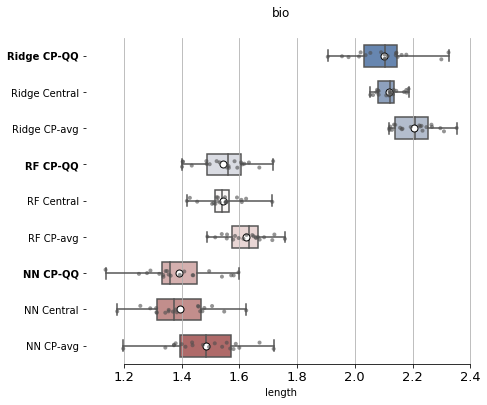

In [9]:
f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="length", y="method", data=df, whis=[0, 100], width=.6, palette="vlag", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"7"})

sns.stripplot(x="length", y="method", data=df, size=4, color=".3", linewidth=0, alpha=.6)

plt.title(name_dataset + '\n')
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
ax.get_yticklabels()[0].set_fontweight("bold")
ax.get_yticklabels()[3].set_fontweight("bold")
ax.get_yticklabels()[6].set_fontweight("bold");